<a href="https://colab.research.google.com/github/lovnishverma/Python-Getting-Started/blob/main/Classification_using_Supervised_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAGIC Gamma Telescope Classification using Supervised Learning Models

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

# ---------------------- Load Dataset ----------------------

In [5]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym",
        "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv(
    "https://raw.githubusercontent.com/lovnishverma/datasets/refs/heads/main/magic%2Bgamma%2Btelescope/magic04.data", names=cols)

# Convert class labels to binary
df["class"] = (df["class"] == "g").astype(int)

# ---------------------- Visualize Features ----------------------

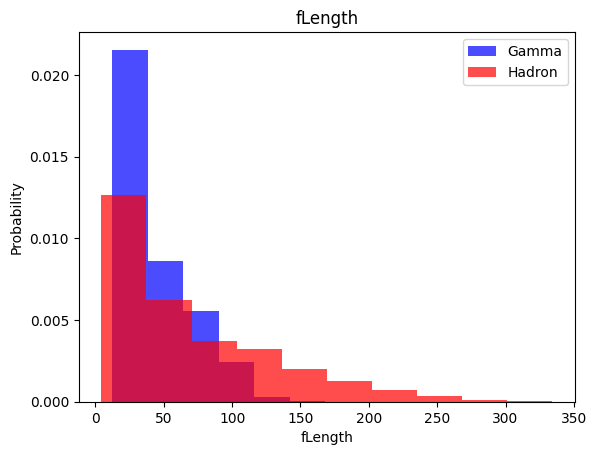

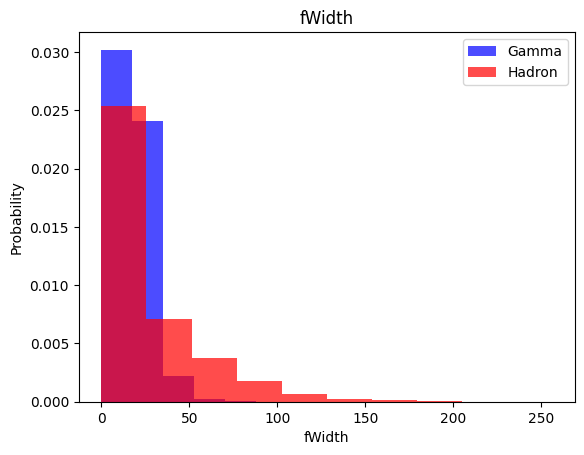

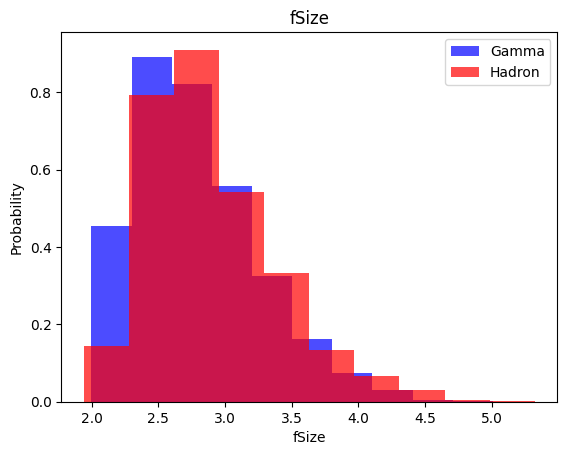

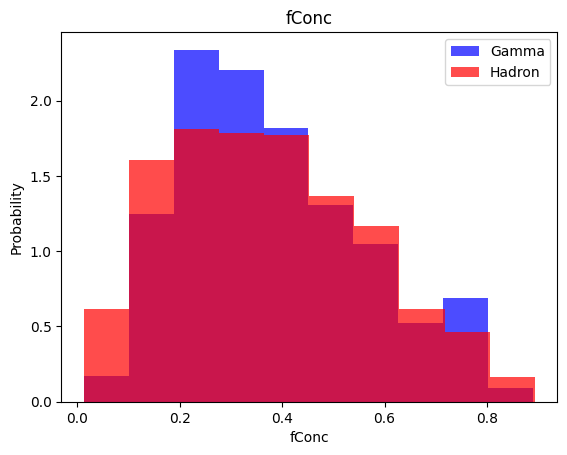

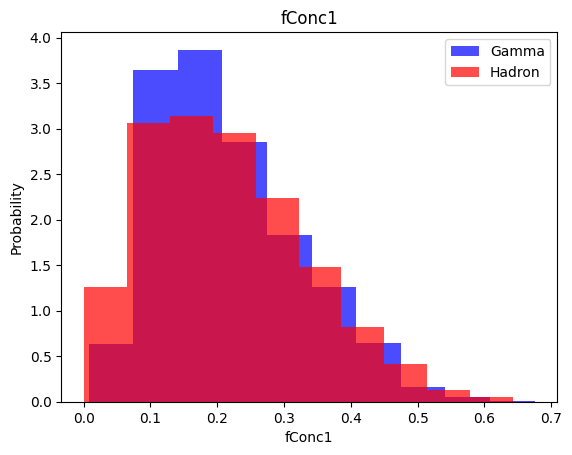

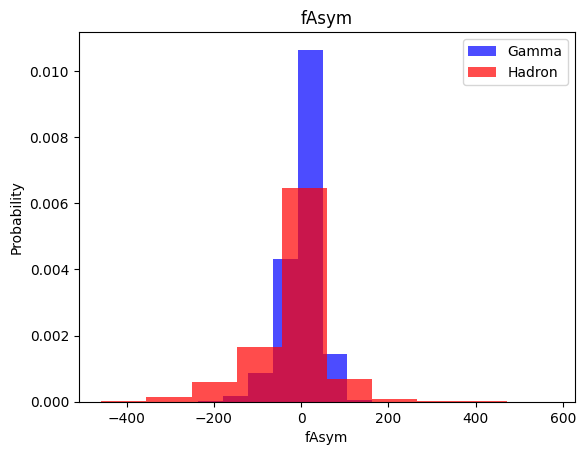

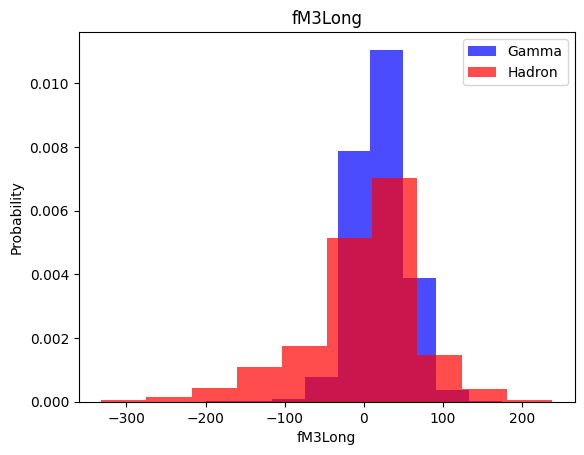

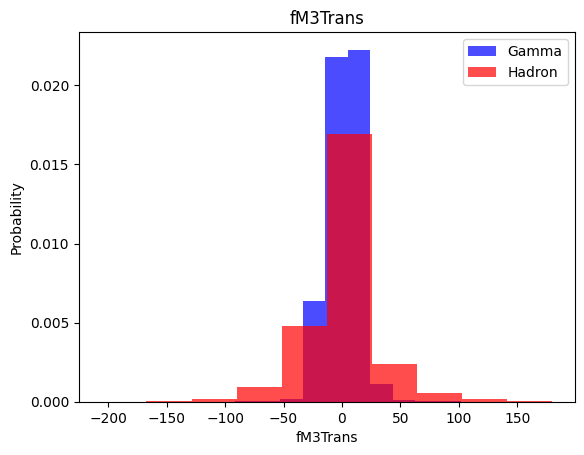

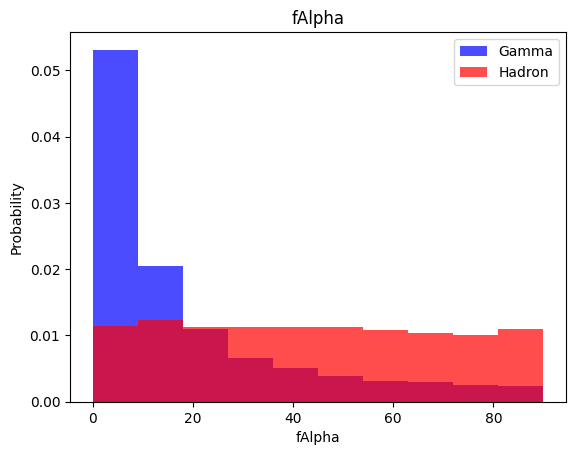

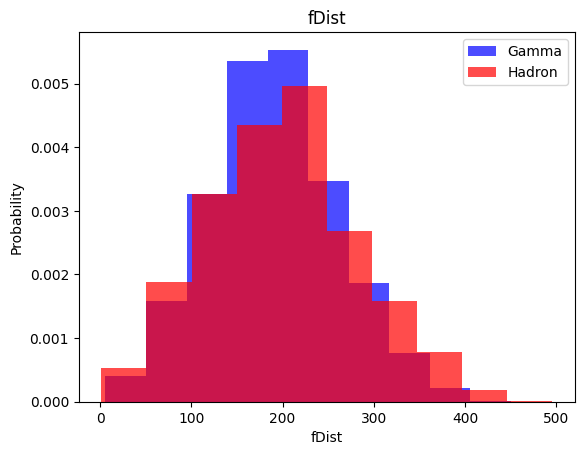

In [6]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color='blue', label='Gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0][label], color='red', label='Hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Probability")
    plt.legend()
    plt.show()

# ---------------------- Split Dataset ----------------------

In [7]:
train, valid, test = np.split(df.sample(frac=1, random_state=42),
                              [int(0.6*len(df)), int(0.8*len(df))])

def scale_dataset(dataframe, oversample=False):
    X = dataframe.iloc[:, :-1].values
    y = dataframe.iloc[:, -1].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    return np.hstack((X, y.reshape(-1, 1))), X, y

train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid)
test, X_test, y_test = scale_dataset(test)

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


# ---------------------- Helper: Evaluation Function ----------------------

In [8]:
def evaluate_model(model, name, X_test, y_test, use_proba=False):
    if name == "Neural Net":
        y_pred_proba = model.predict(X_test).ravel()
    elif hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_test)

    y_pred = (y_pred_proba > 0.5).astype(int)
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Hadron", "Gamma"], cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"{name} - ROC Curve")
    plt.legend()
    plt.grid()
    plt.show()

    return accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)


# ---------------------- Model 1: k-Nearest Neighbors ----------------------


=== k-NN ===
              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1331
           1       0.86      0.85      0.86      2473

    accuracy                           0.81      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.81      0.82      3804



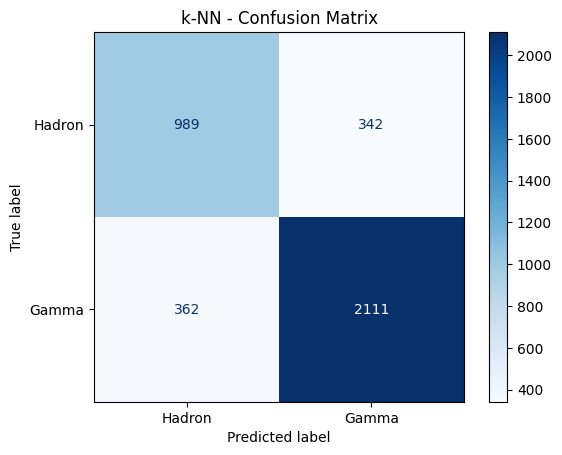

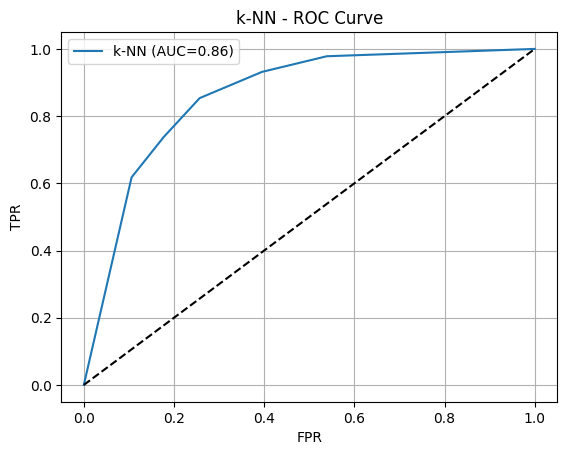

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_scores = evaluate_model(knn_model, "k-NN", X_test, y_test)

# ---------------------- Model 2: Naive Bayes ----------------------


=== Naive Bayes ===
              precision    recall  f1-score   support

           0       0.66      0.39      0.49      1331
           1       0.73      0.89      0.80      2473

    accuracy                           0.72      3804
   macro avg       0.70      0.64      0.65      3804
weighted avg       0.71      0.72      0.69      3804



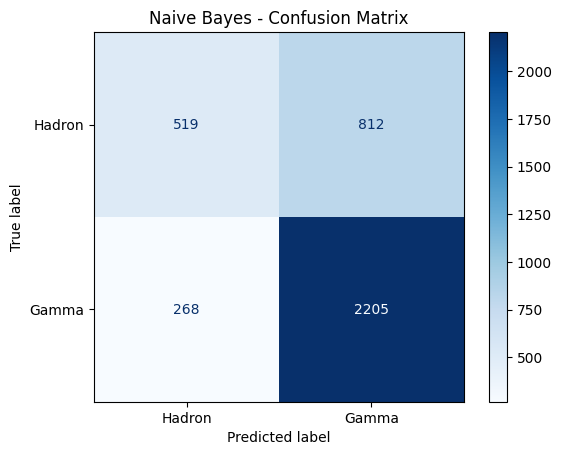

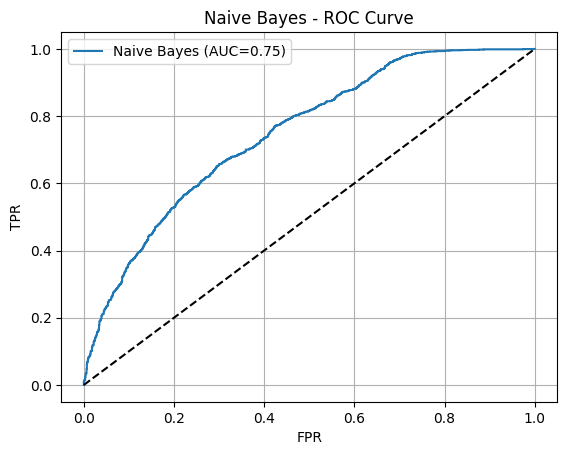

In [10]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_scores = evaluate_model(nb_model, "Naive Bayes", X_test, y_test)

# ---------------------- Model 3: Logistic Regression ----------------------


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1331
           1       0.84      0.81      0.83      2473

    accuracy                           0.78      3804
   macro avg       0.75      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



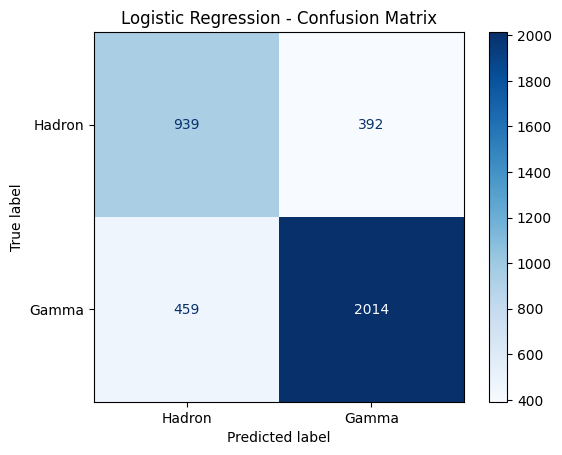

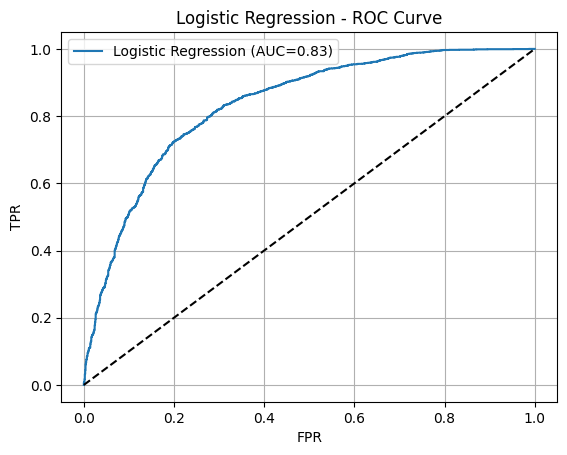

In [11]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression(max_iter=200)
lg_model.fit(X_train, y_train)
lg_scores = evaluate_model(lg_model, "Logistic Regression", X_test, y_test)

# ---------------------- Model 4: SVM ----------------------


=== SVM ===
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1331
           1       0.89      0.88      0.88      2473

    accuracy                           0.85      3804
   macro avg       0.83      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



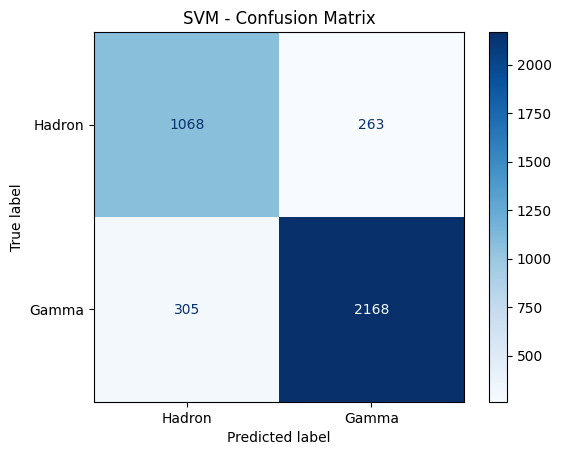

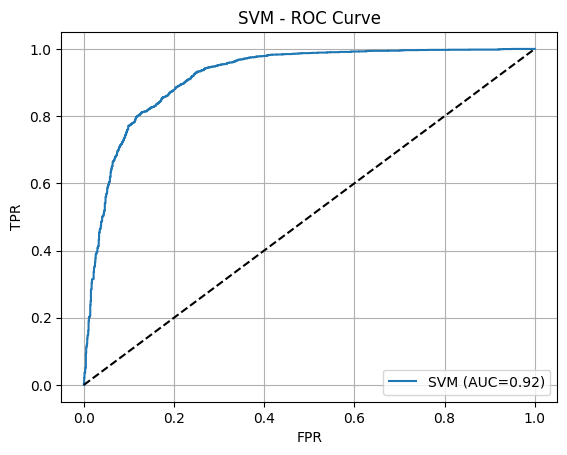

In [12]:
from sklearn.svm import SVC
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_scores = evaluate_model(svm_model, "SVM", X_test, y_test)

# ---------------------- Model 5: Neural Network ----------------------

In [13]:
import tensorflow as tf

def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(history.history['loss'], label='Train Loss')
    ax1.plot(history.history['val_loss'], label='Val Loss')
    ax1.set_title("Loss")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Binary Crossentropy")
    ax1.grid()
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='Train Acc')
    ax2.plot(history.history['val_accuracy'], label='Val Acc')
    ax2.set_title("Accuracy")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Accuracy")
    ax2.grid()
    ax2.legend()

    plt.tight_layout()
    plt.show()

def train_nn_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=epochs,
                        batch_size=batch_size, validation_split=0.2, verbose=0)
    return model, history


Training NN: nodes=16, dropout=0, lr=0.01, batch=32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


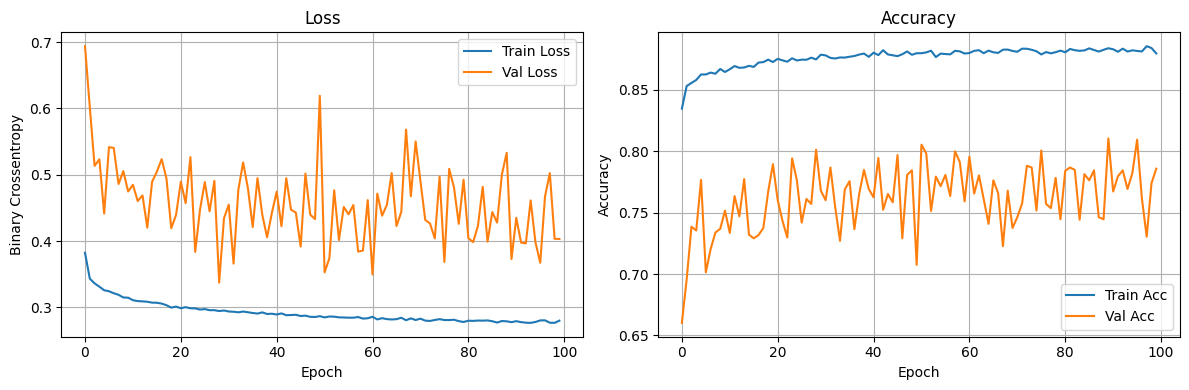

Training NN: nodes=16, dropout=0, lr=0.01, batch=64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


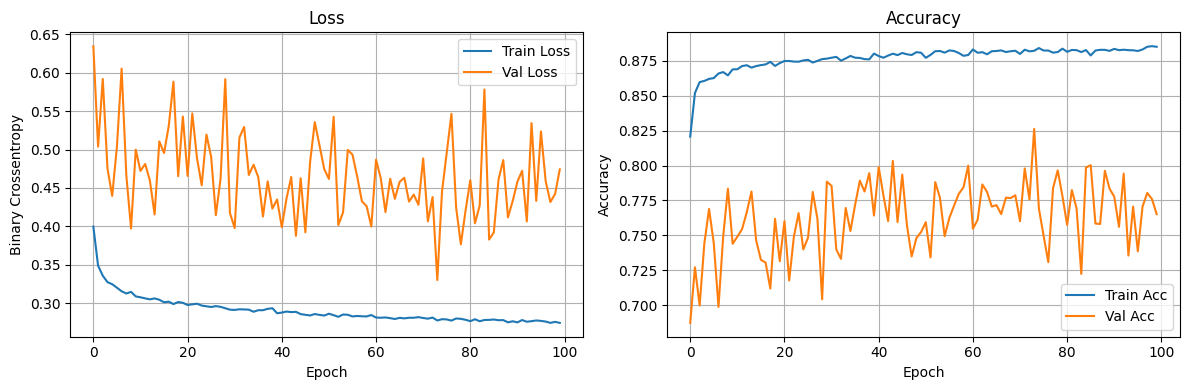

Training NN: nodes=16, dropout=0, lr=0.01, batch=128


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


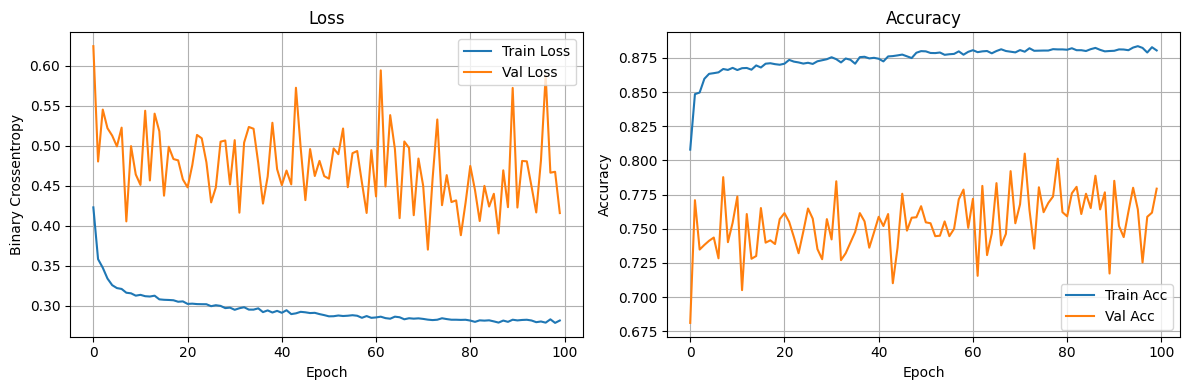

Training NN: nodes=16, dropout=0, lr=0.005, batch=32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


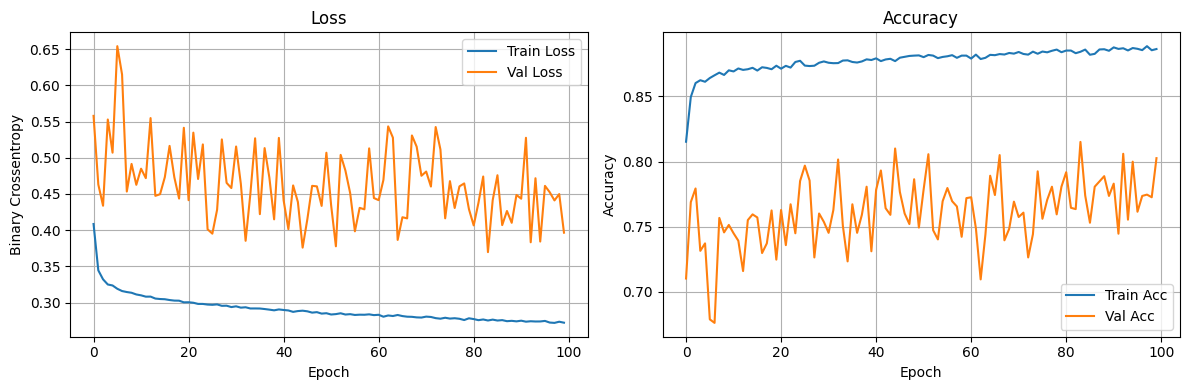

Training NN: nodes=16, dropout=0, lr=0.005, batch=64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


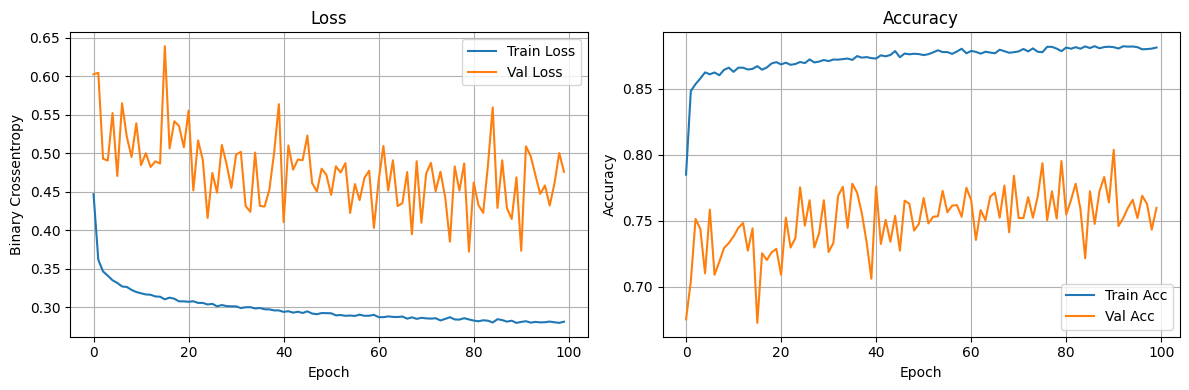

Training NN: nodes=16, dropout=0, lr=0.005, batch=128


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


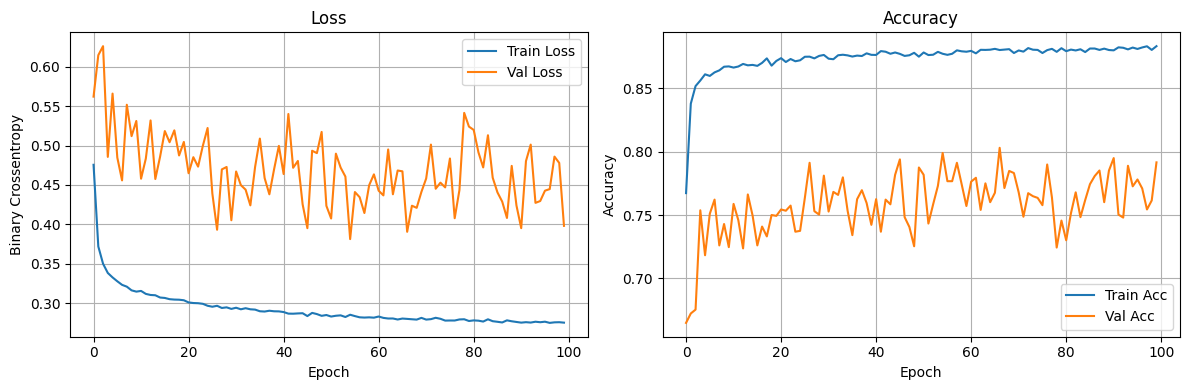

Training NN: nodes=16, dropout=0, lr=0.001, batch=32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


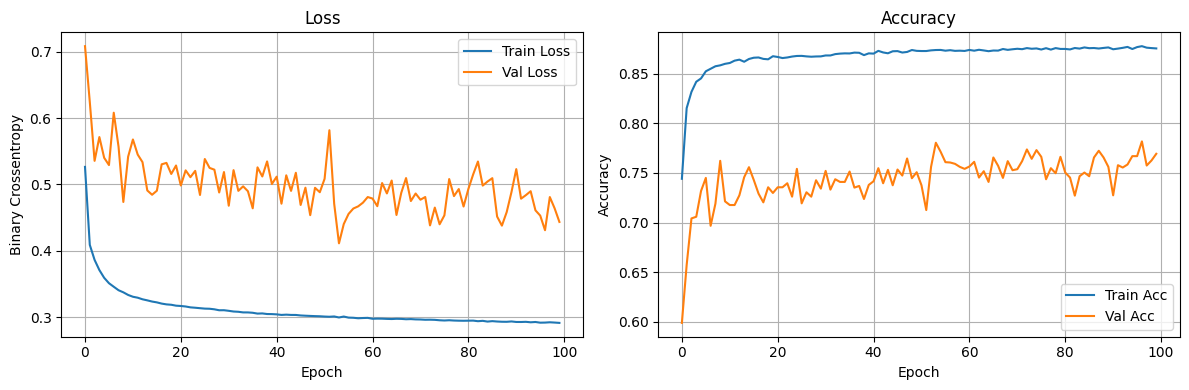

Training NN: nodes=16, dropout=0, lr=0.001, batch=64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


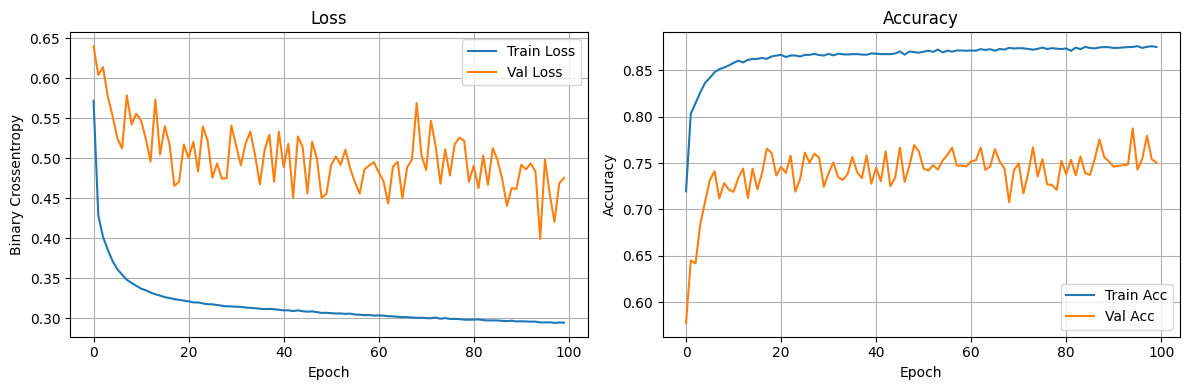

Training NN: nodes=16, dropout=0, lr=0.001, batch=128


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


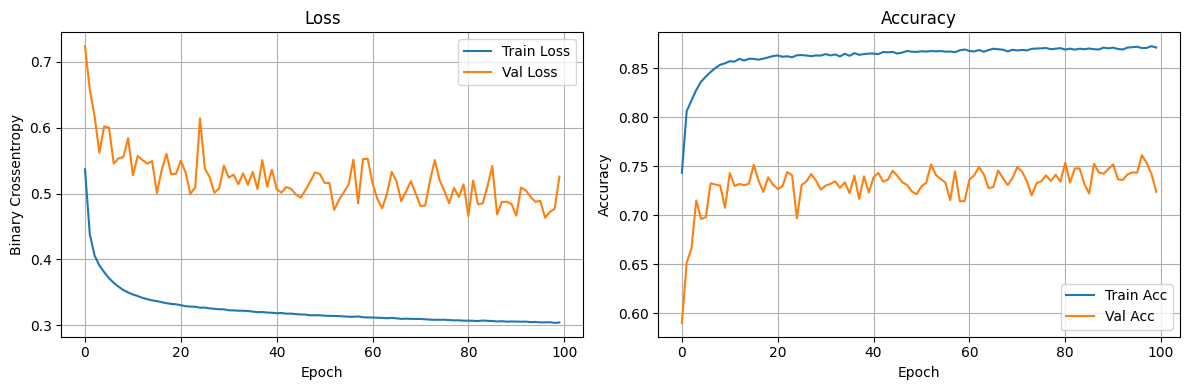

Training NN: nodes=16, dropout=0.2, lr=0.01, batch=32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


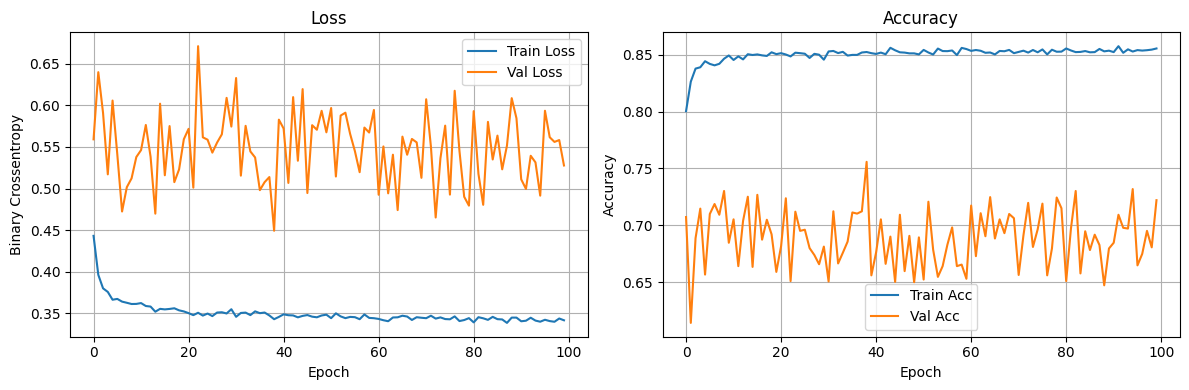

Training NN: nodes=16, dropout=0.2, lr=0.01, batch=64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


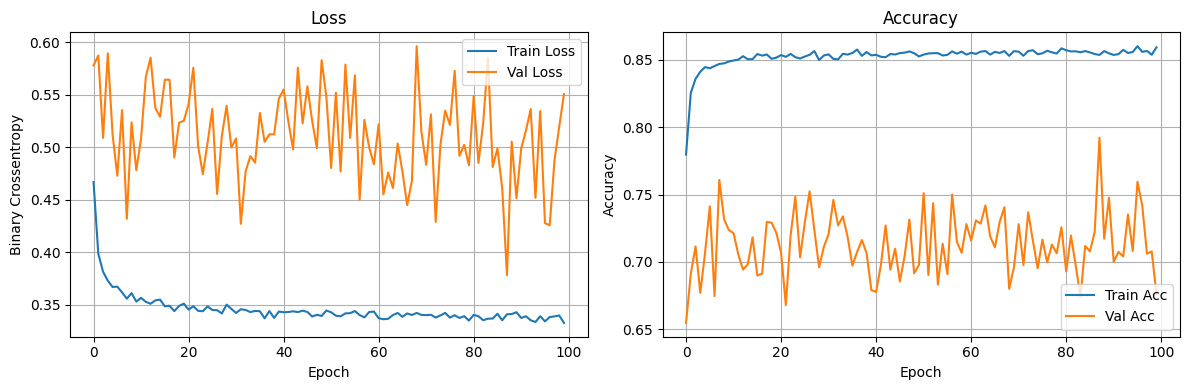

Training NN: nodes=16, dropout=0.2, lr=0.01, batch=128


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


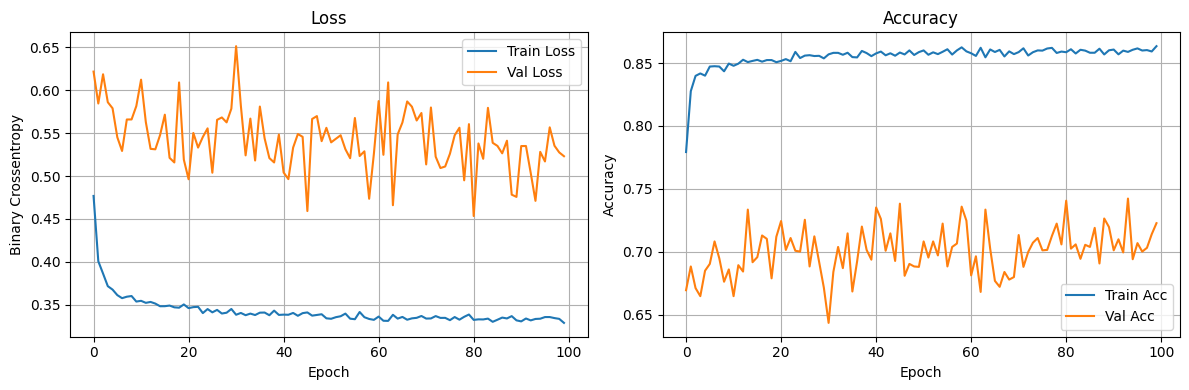

Training NN: nodes=16, dropout=0.2, lr=0.005, batch=32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


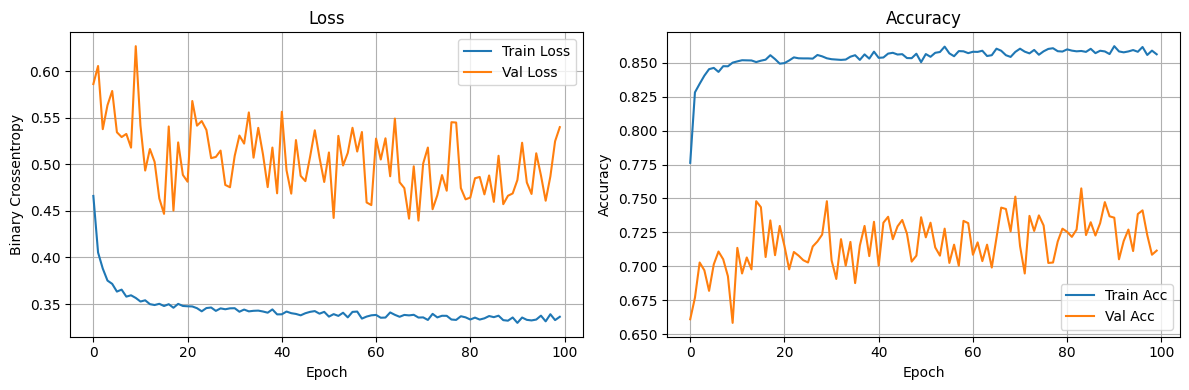

Training NN: nodes=16, dropout=0.2, lr=0.005, batch=64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


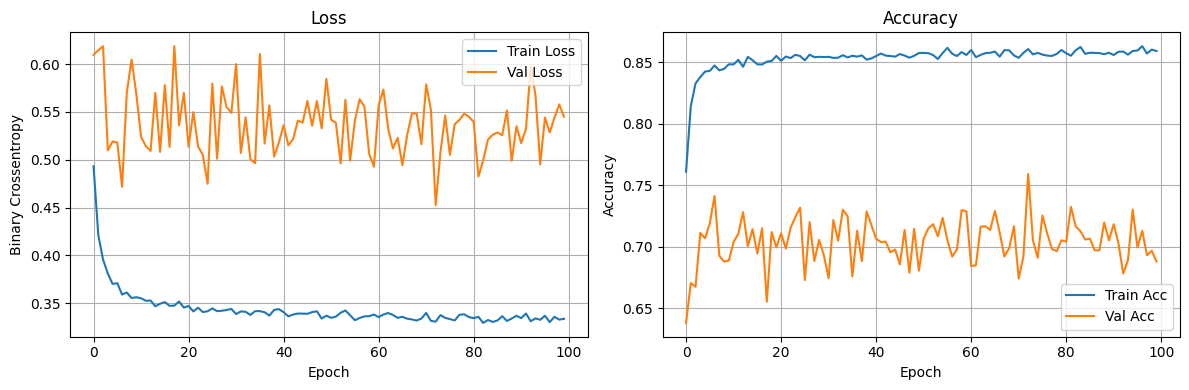

Training NN: nodes=16, dropout=0.2, lr=0.005, batch=128


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


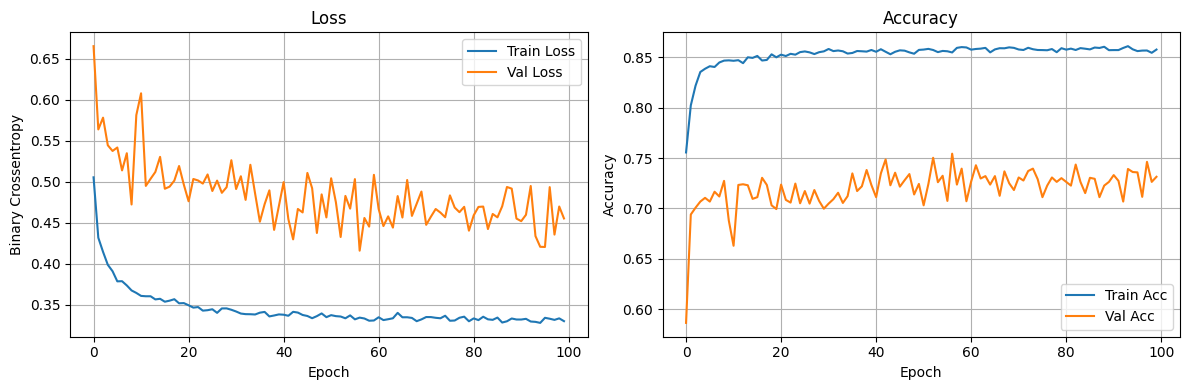

Training NN: nodes=16, dropout=0.2, lr=0.001, batch=32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


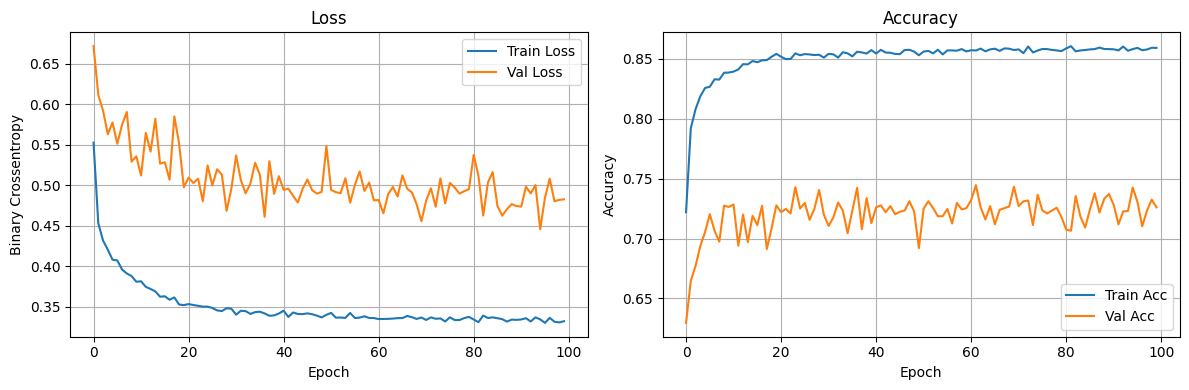

Training NN: nodes=16, dropout=0.2, lr=0.001, batch=64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


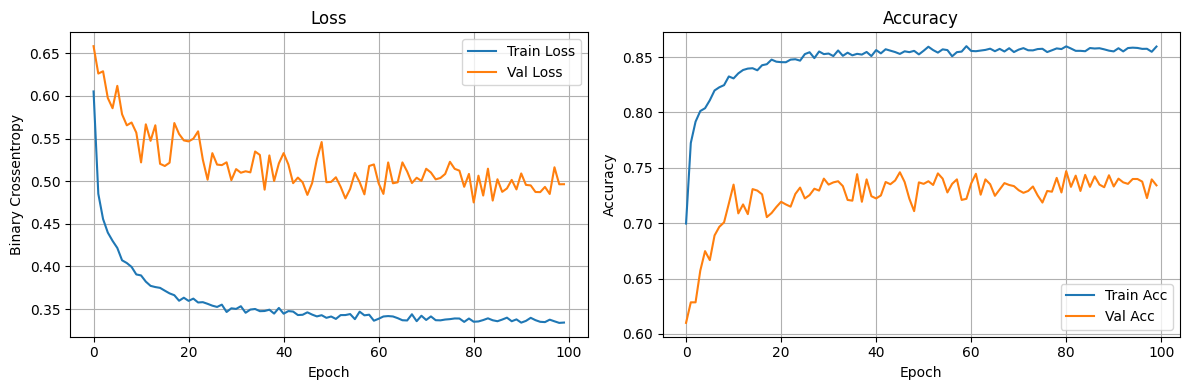

Training NN: nodes=16, dropout=0.2, lr=0.001, batch=128


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


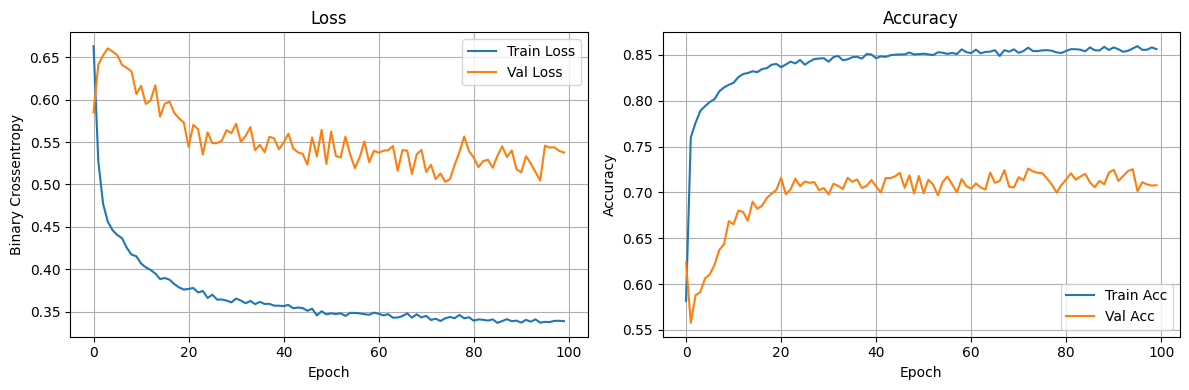

Training NN: nodes=32, dropout=0, lr=0.01, batch=32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


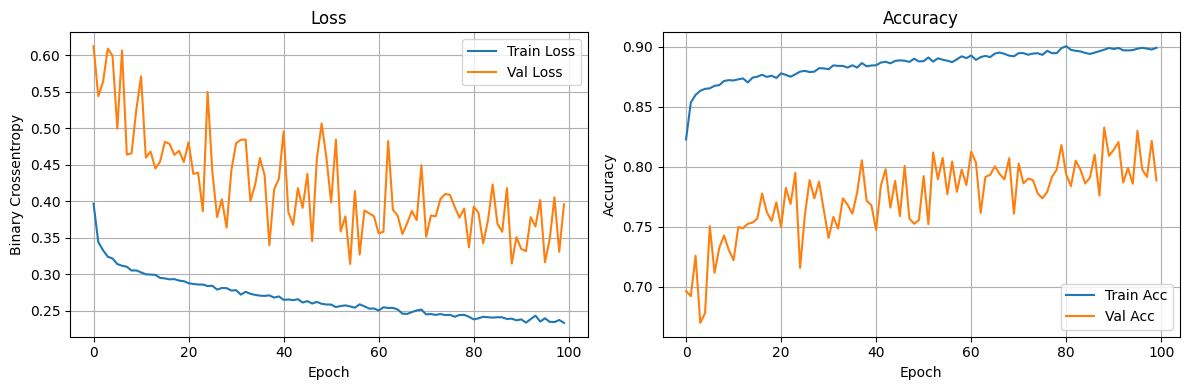

Training NN: nodes=32, dropout=0, lr=0.01, batch=64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


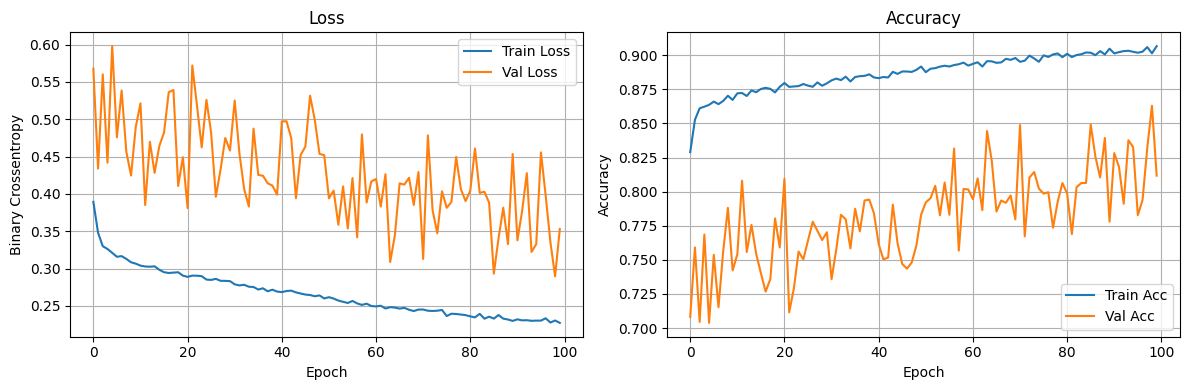

Training NN: nodes=32, dropout=0, lr=0.01, batch=128


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


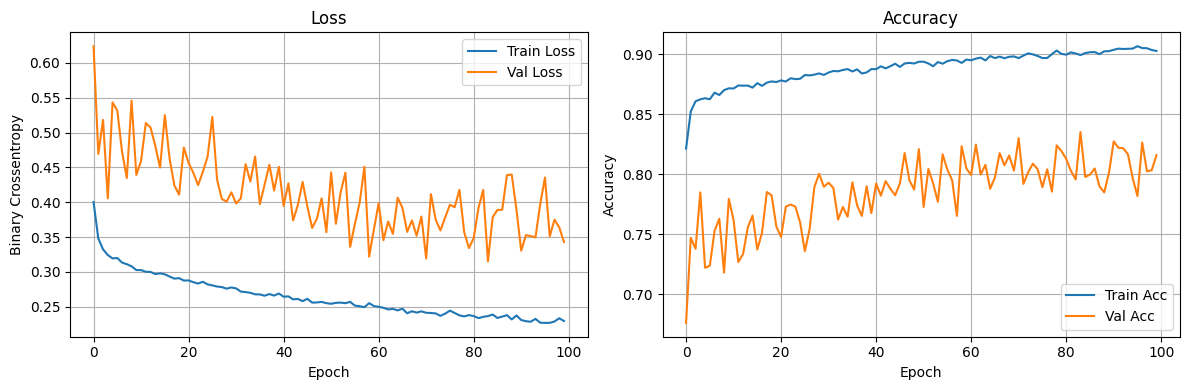

Training NN: nodes=32, dropout=0, lr=0.005, batch=32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


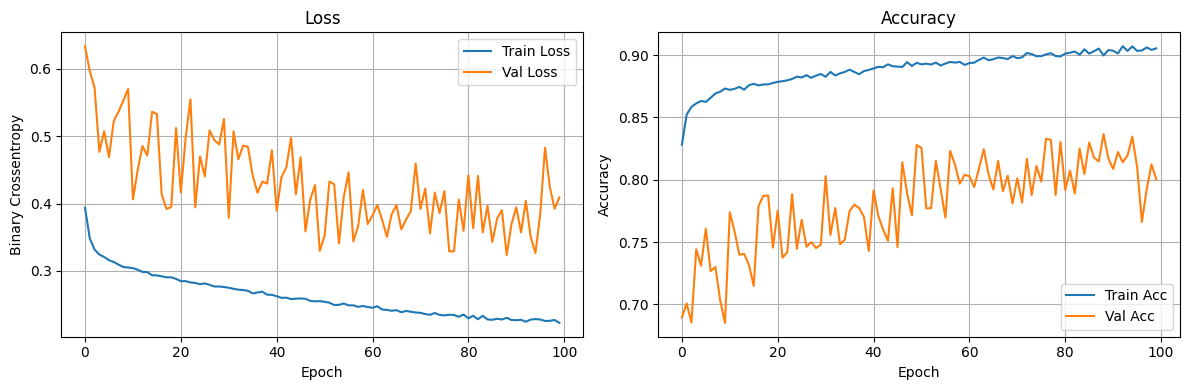

Training NN: nodes=32, dropout=0, lr=0.005, batch=64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


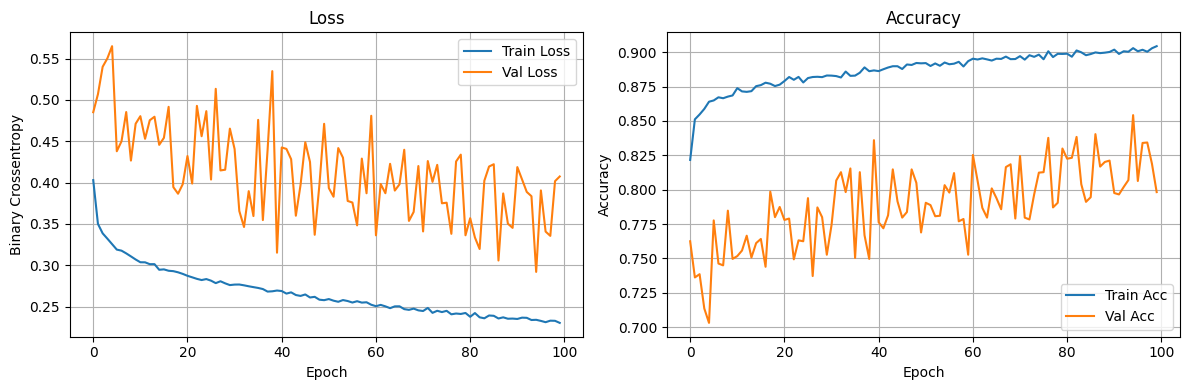

Training NN: nodes=32, dropout=0, lr=0.005, batch=128


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


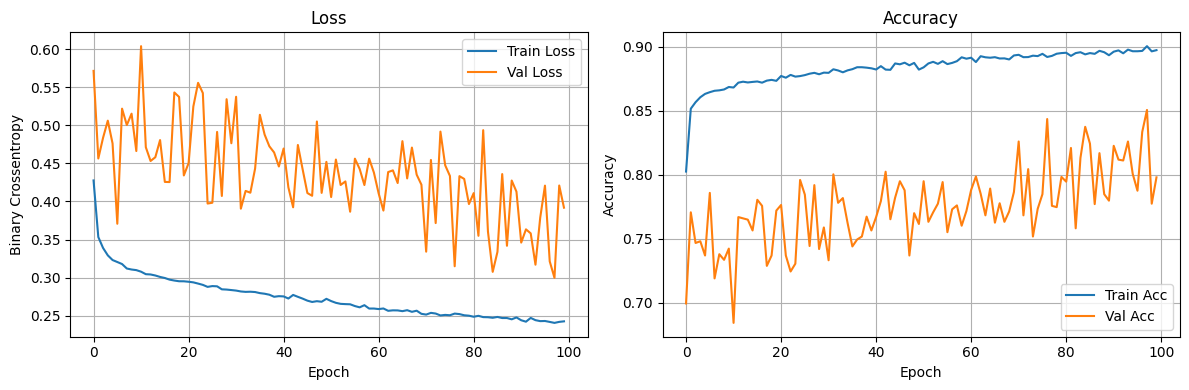

Training NN: nodes=32, dropout=0, lr=0.001, batch=32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


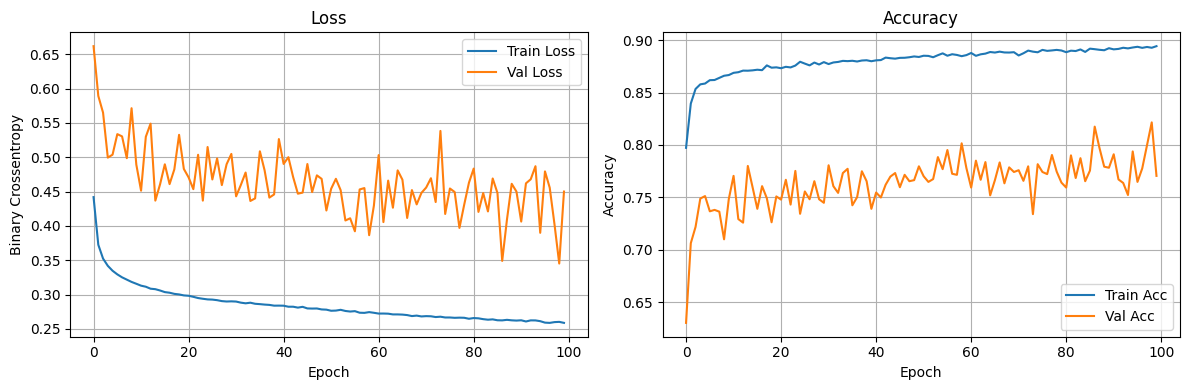

Training NN: nodes=32, dropout=0, lr=0.001, batch=64


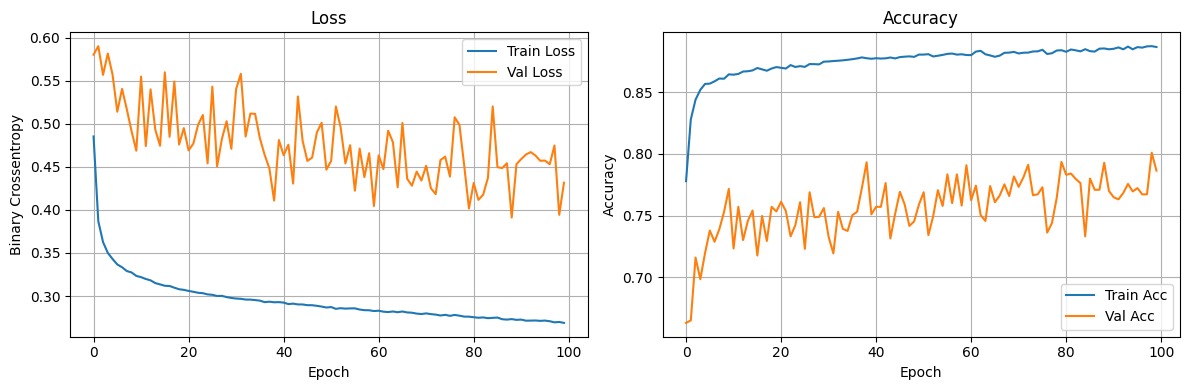

Training NN: nodes=32, dropout=0, lr=0.001, batch=128


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


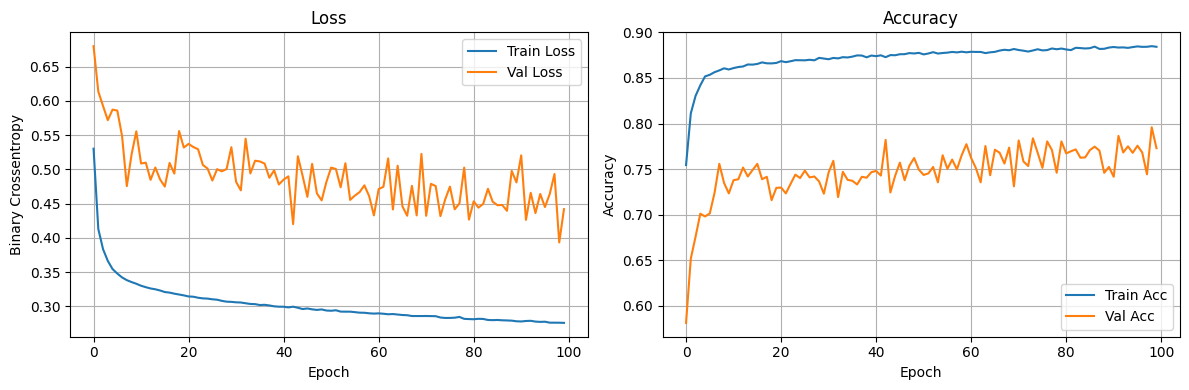

Training NN: nodes=32, dropout=0.2, lr=0.01, batch=32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


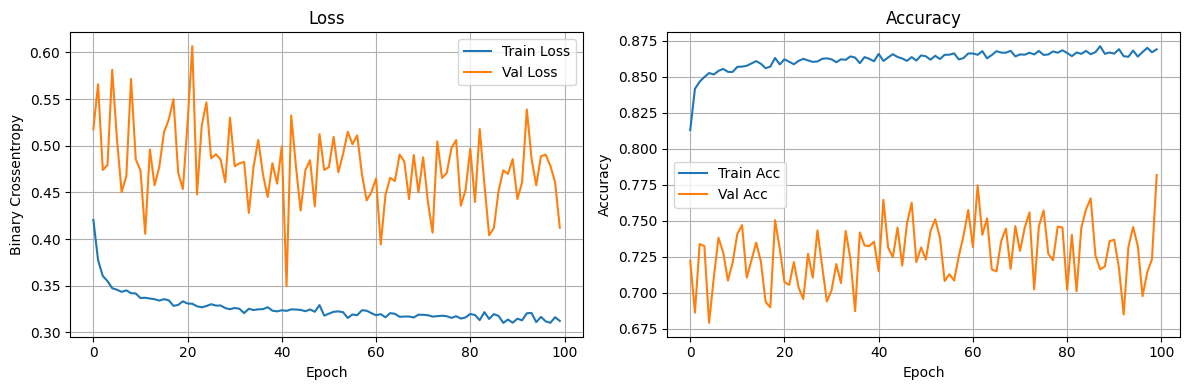

Training NN: nodes=32, dropout=0.2, lr=0.01, batch=64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


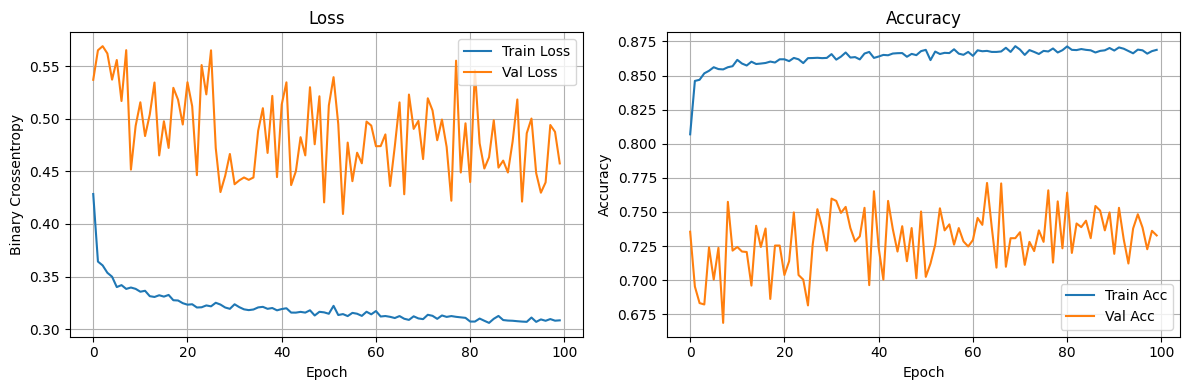

Training NN: nodes=32, dropout=0.2, lr=0.01, batch=128


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


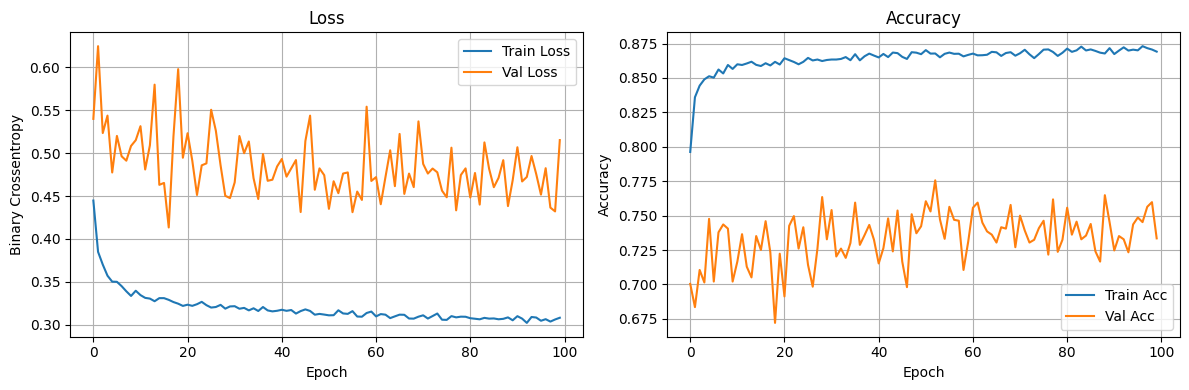

Training NN: nodes=32, dropout=0.2, lr=0.005, batch=32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


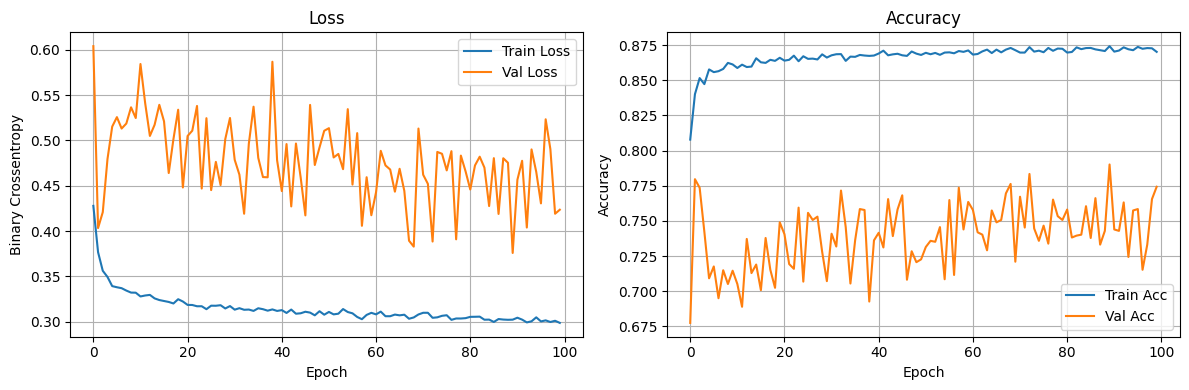

Training NN: nodes=32, dropout=0.2, lr=0.005, batch=64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


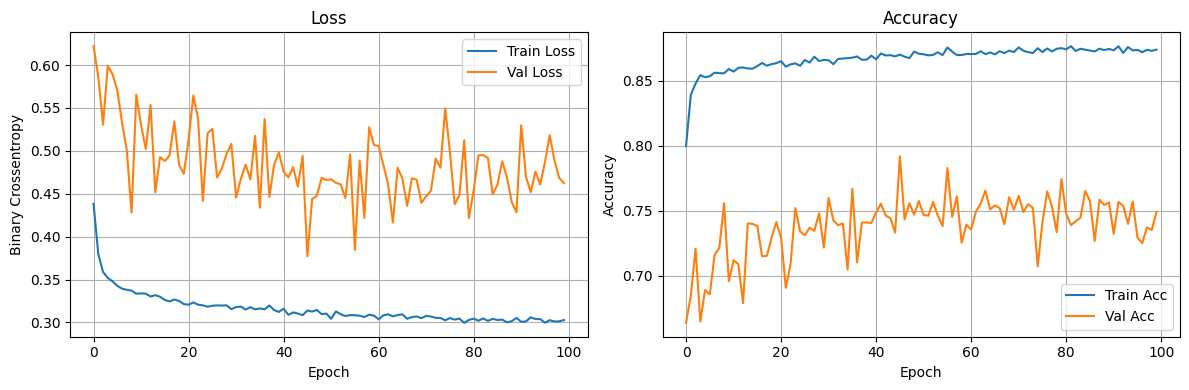

Training NN: nodes=32, dropout=0.2, lr=0.005, batch=128


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


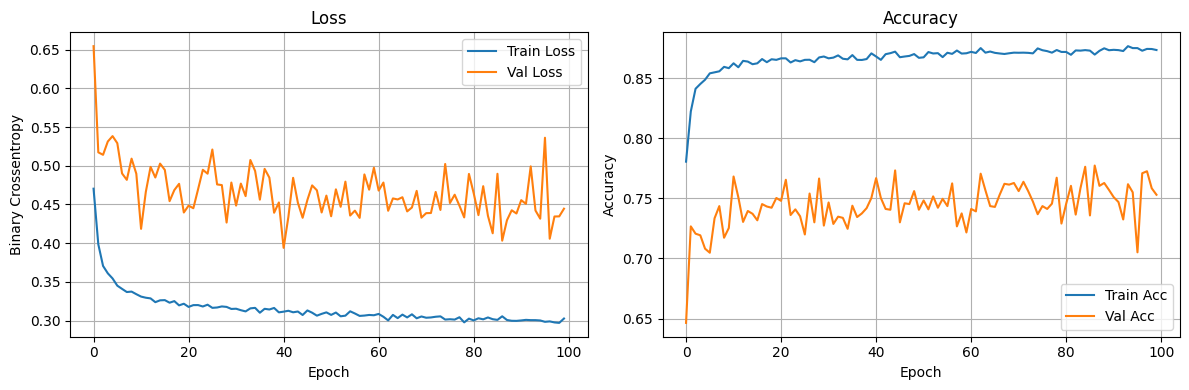

Training NN: nodes=32, dropout=0.2, lr=0.001, batch=32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


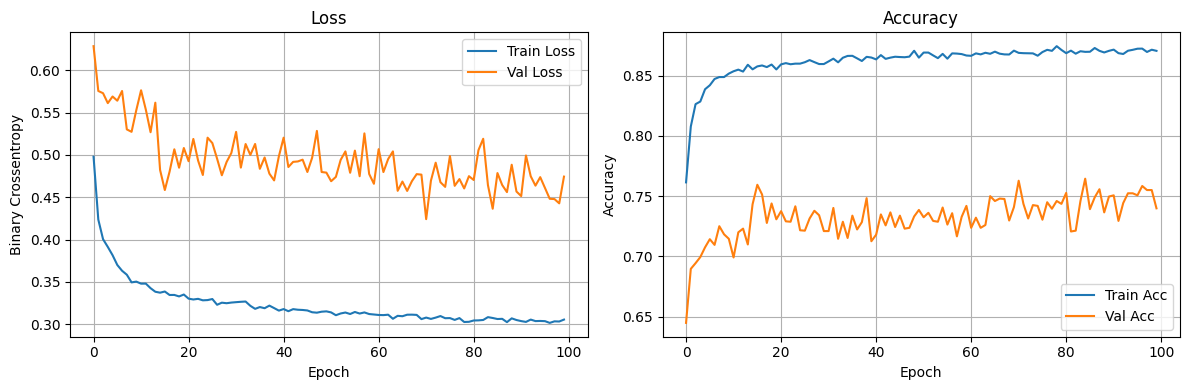

Training NN: nodes=32, dropout=0.2, lr=0.001, batch=64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


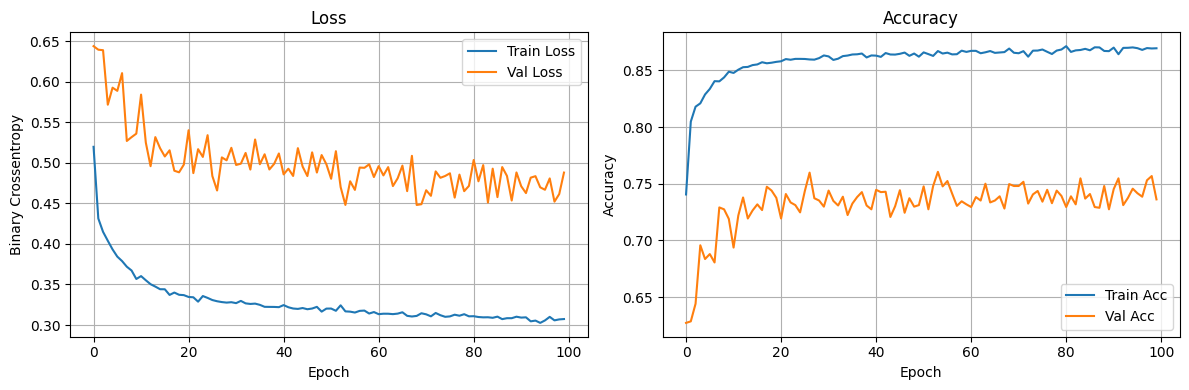

Training NN: nodes=32, dropout=0.2, lr=0.001, batch=128


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


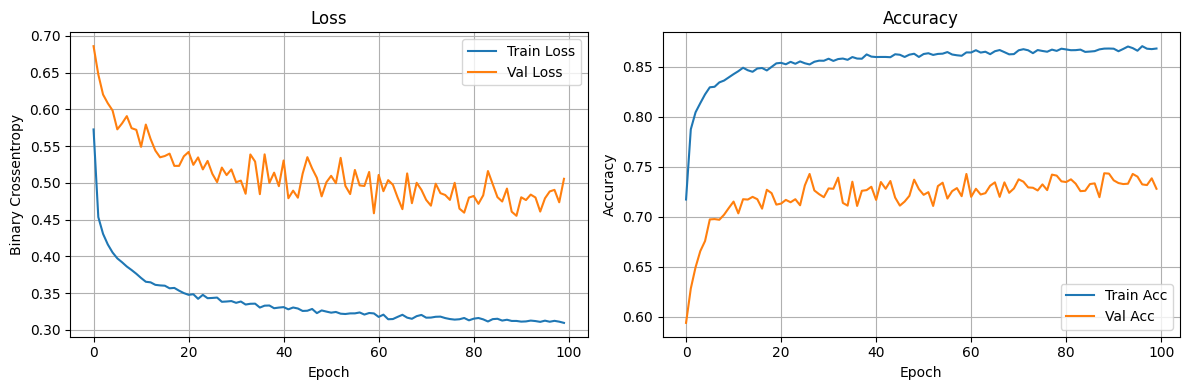

Training NN: nodes=64, dropout=0, lr=0.01, batch=32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


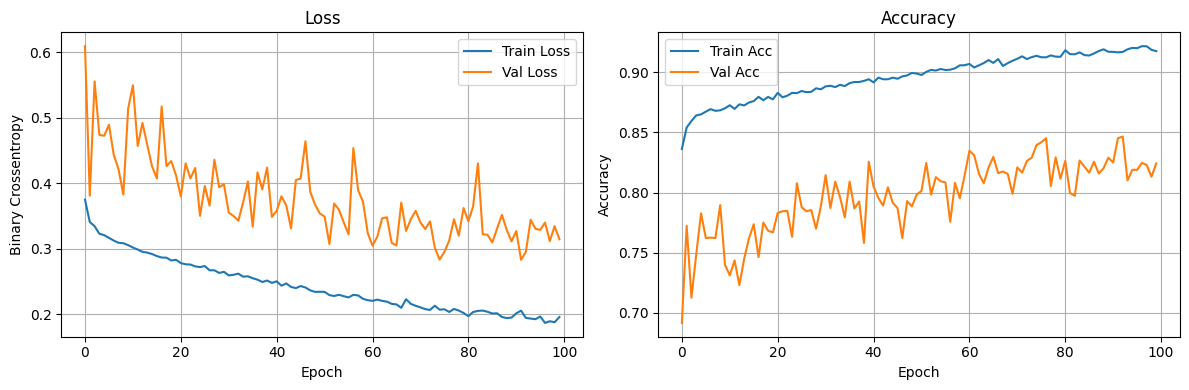

Training NN: nodes=64, dropout=0, lr=0.01, batch=64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


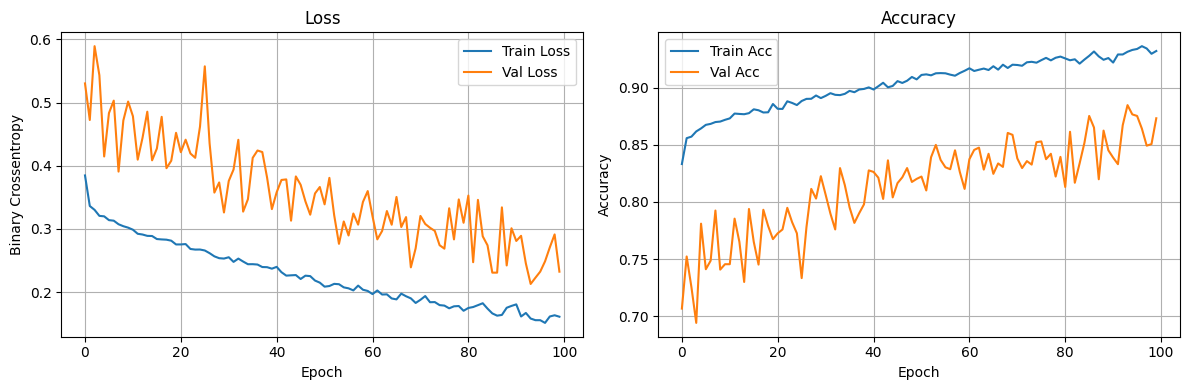

Training NN: nodes=64, dropout=0, lr=0.01, batch=128


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


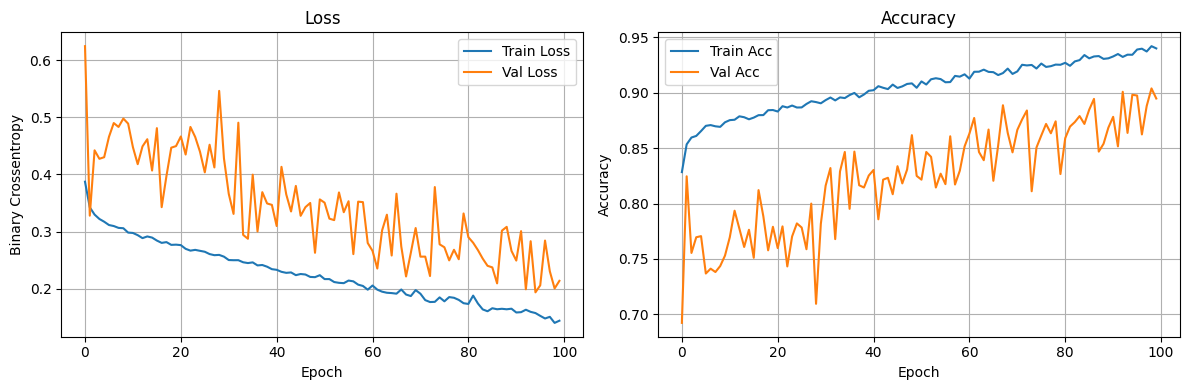

Training NN: nodes=64, dropout=0, lr=0.005, batch=32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


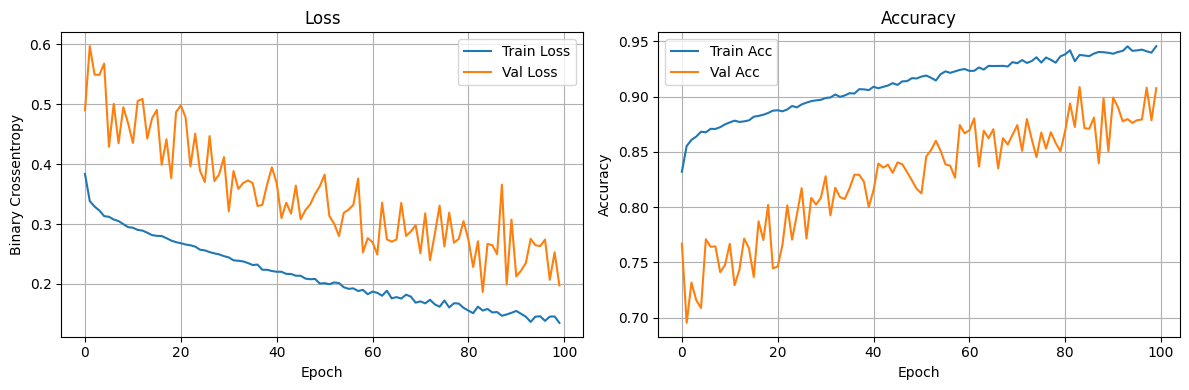

Training NN: nodes=64, dropout=0, lr=0.005, batch=64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


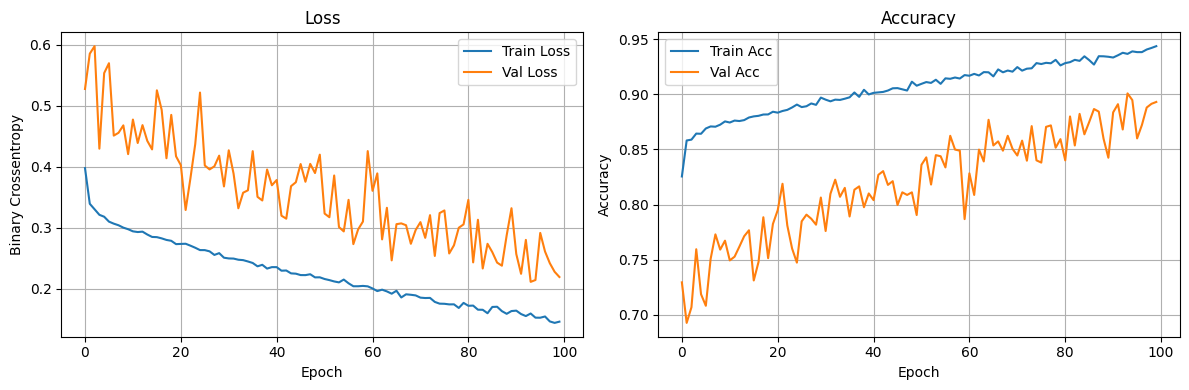

Training NN: nodes=64, dropout=0, lr=0.005, batch=128


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


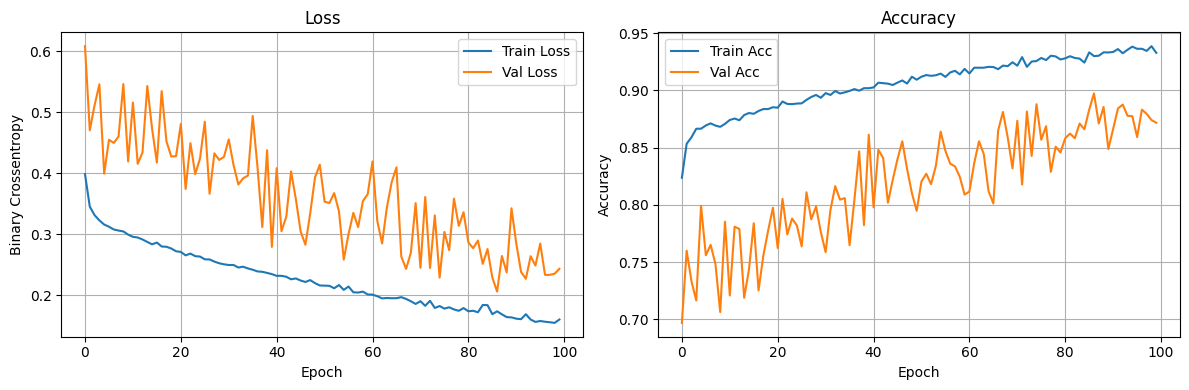

Training NN: nodes=64, dropout=0, lr=0.001, batch=32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


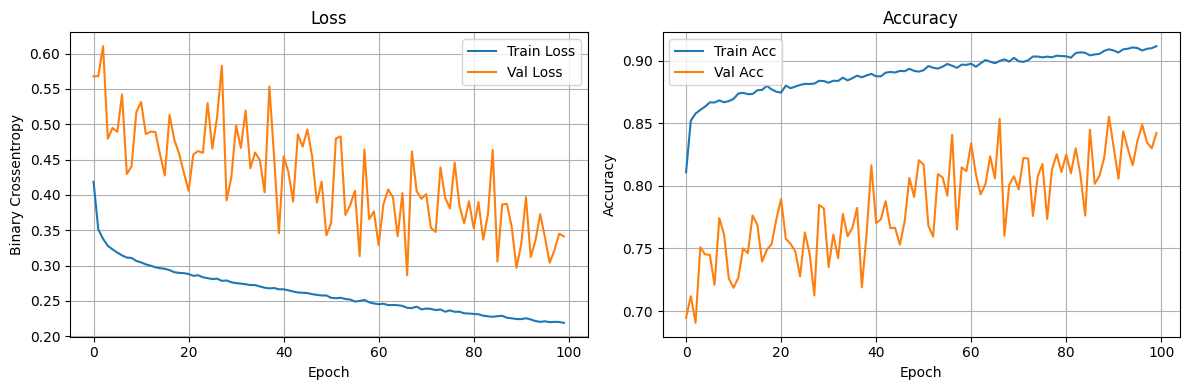

Training NN: nodes=64, dropout=0, lr=0.001, batch=64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


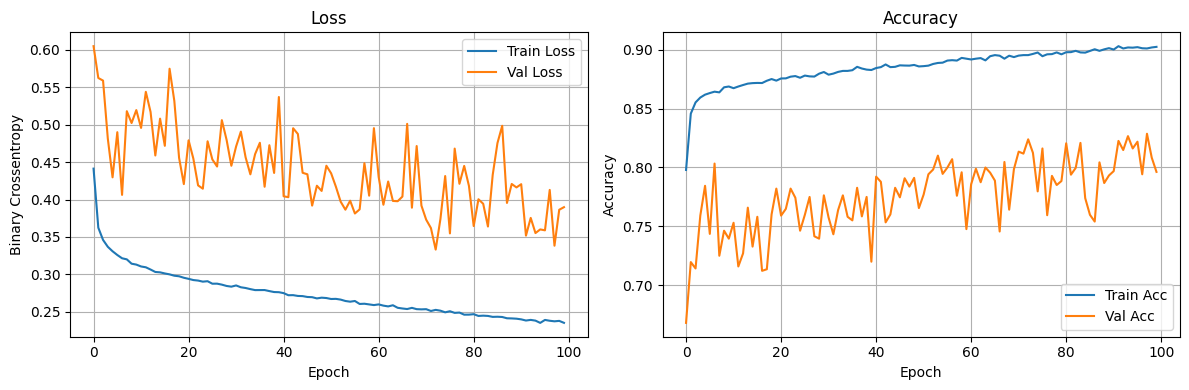

Training NN: nodes=64, dropout=0, lr=0.001, batch=128


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


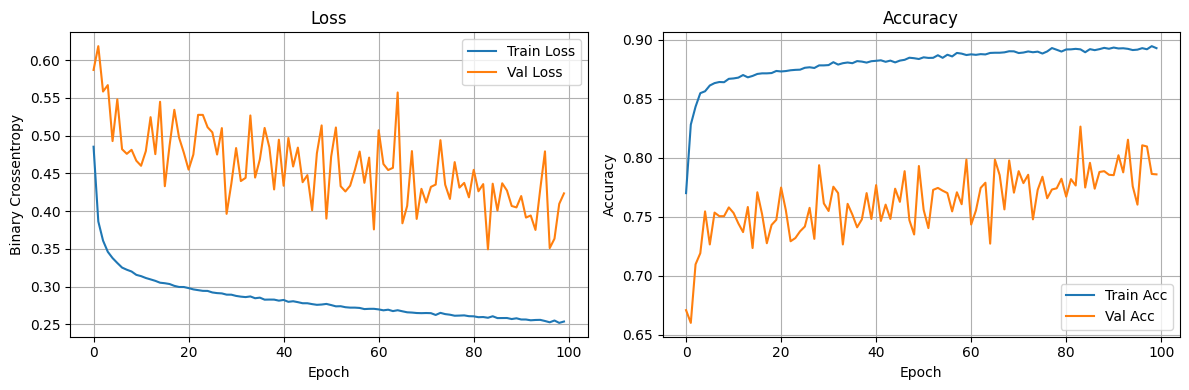

Training NN: nodes=64, dropout=0.2, lr=0.01, batch=32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


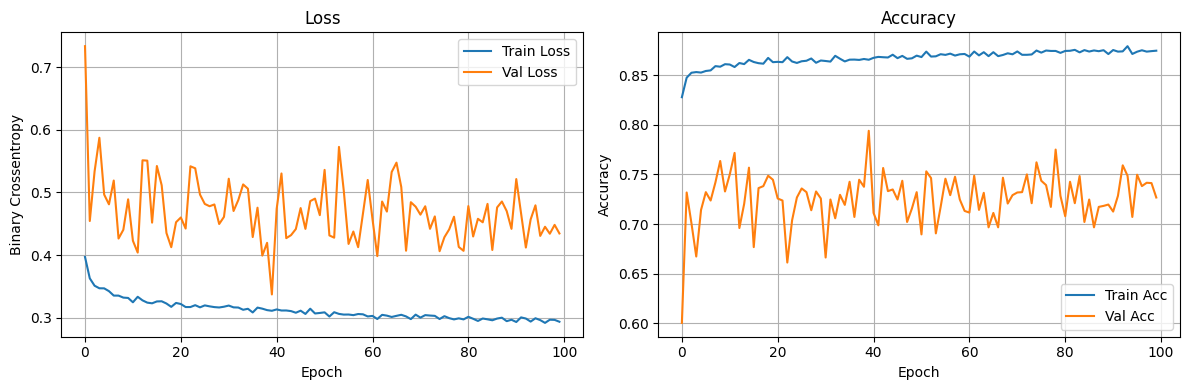

Training NN: nodes=64, dropout=0.2, lr=0.01, batch=64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


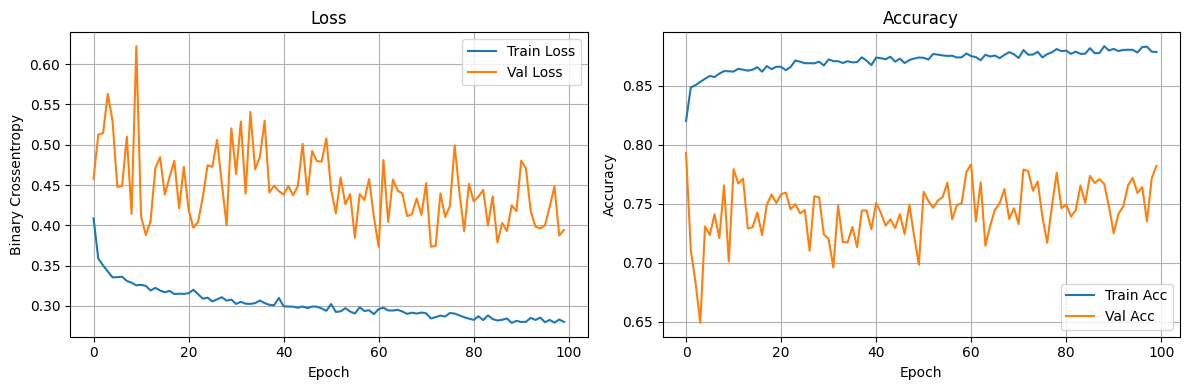

Training NN: nodes=64, dropout=0.2, lr=0.01, batch=128


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


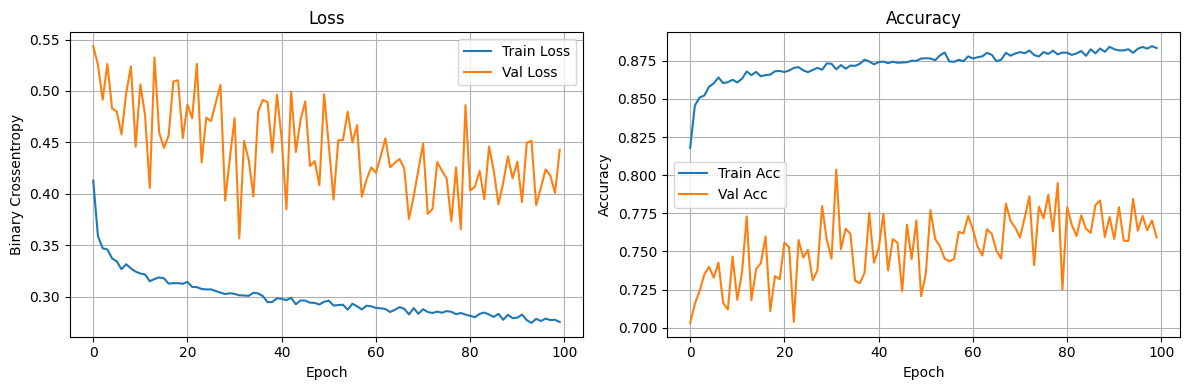

Training NN: nodes=64, dropout=0.2, lr=0.005, batch=32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


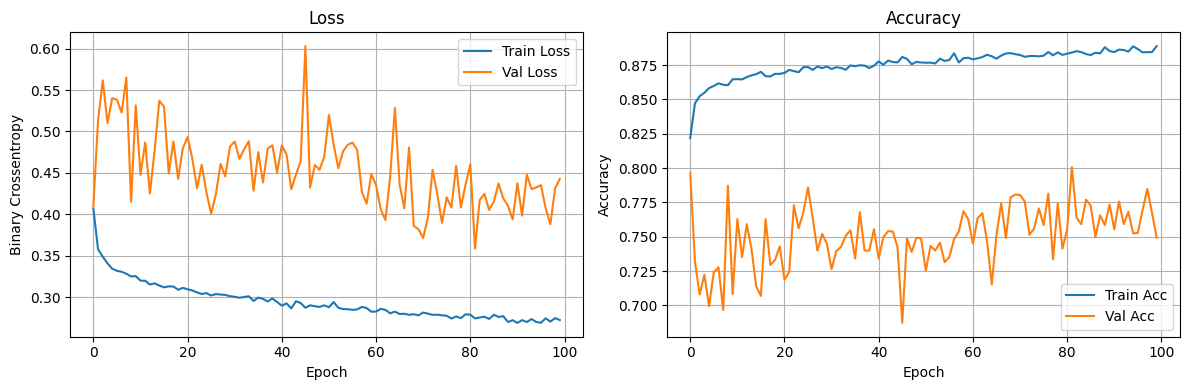

Training NN: nodes=64, dropout=0.2, lr=0.005, batch=64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


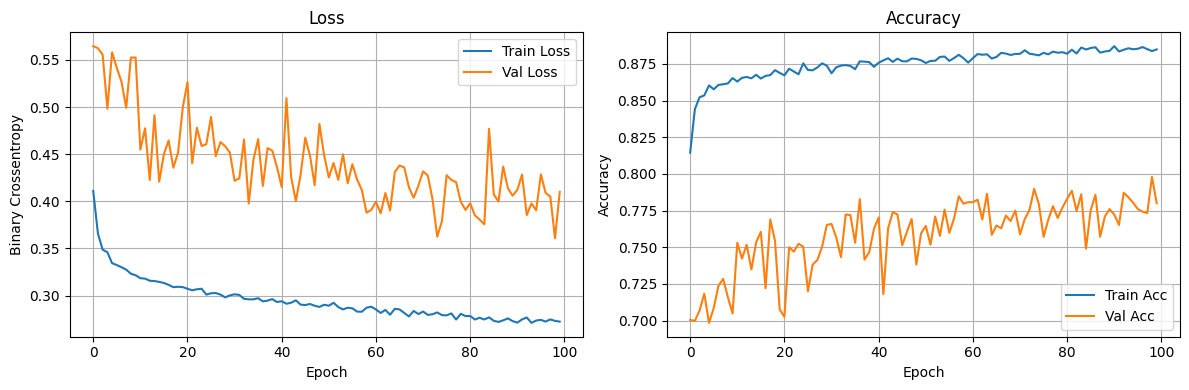

Training NN: nodes=64, dropout=0.2, lr=0.005, batch=128


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


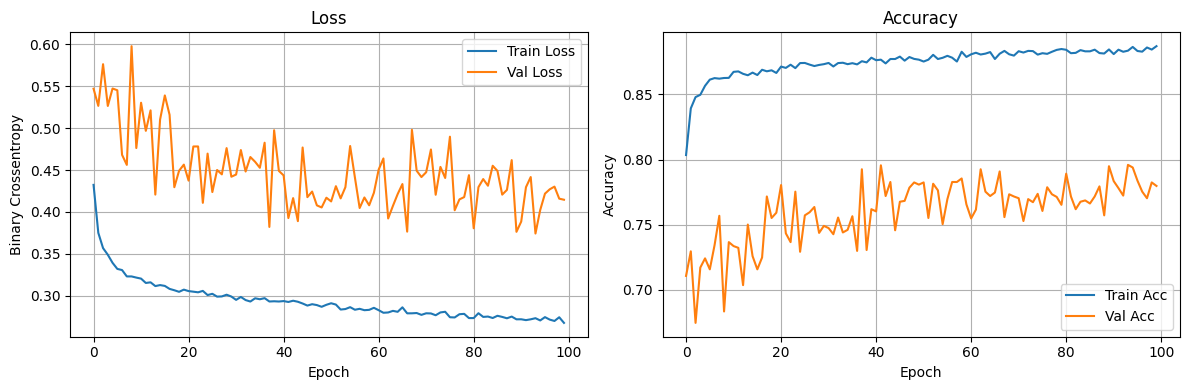

Training NN: nodes=64, dropout=0.2, lr=0.001, batch=32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


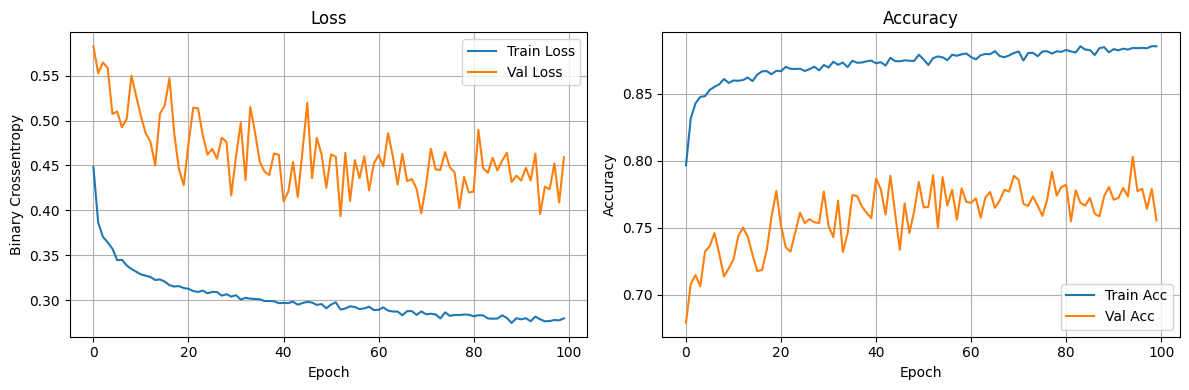

Training NN: nodes=64, dropout=0.2, lr=0.001, batch=64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


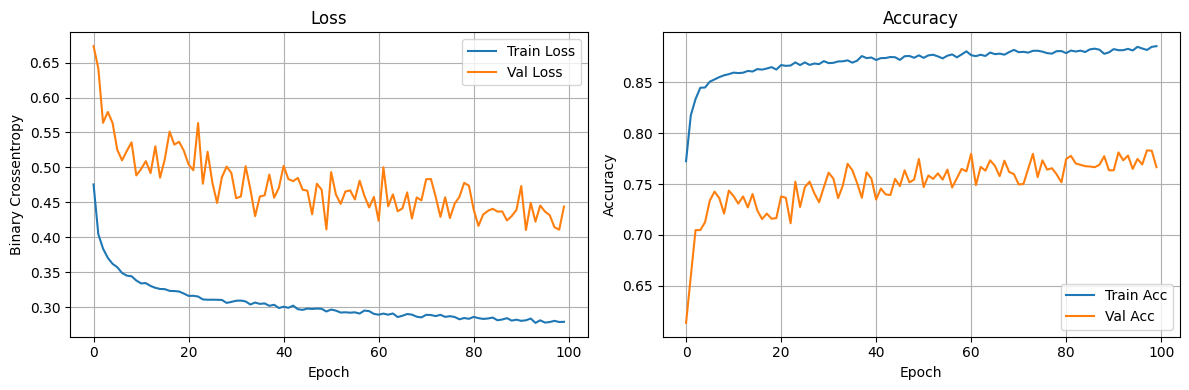

Training NN: nodes=64, dropout=0.2, lr=0.001, batch=128


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


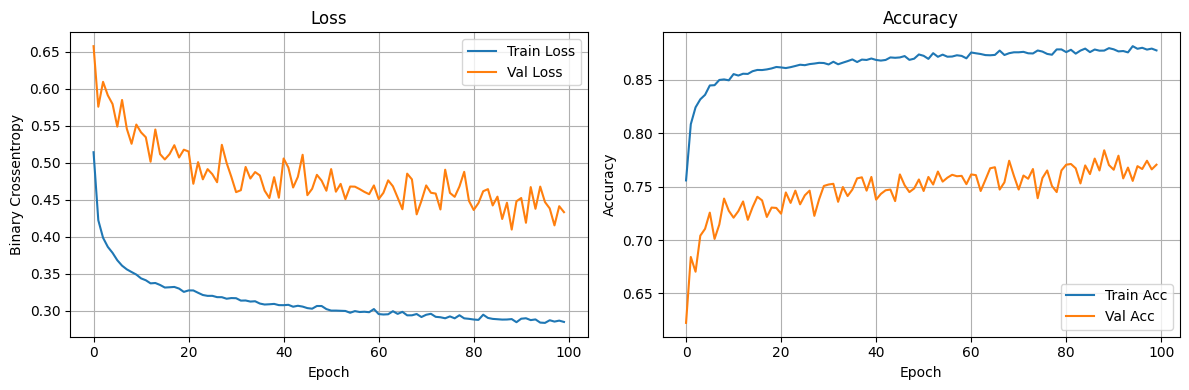

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== Neural Net ===
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1331
           1       0.88      0.93      0.91      2473

    accuracy                           0.87      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804



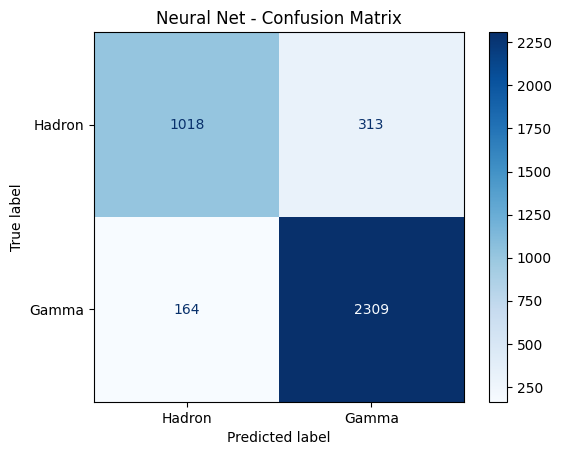

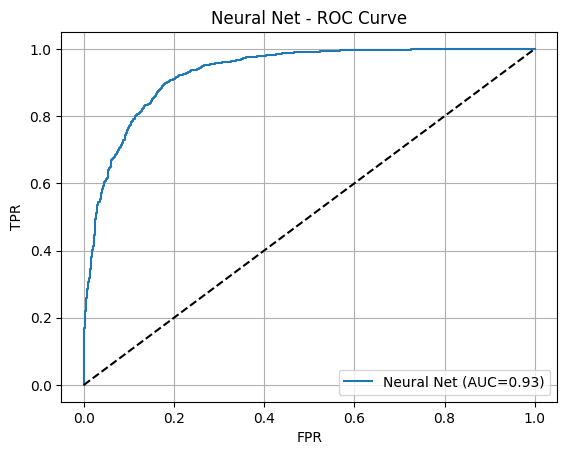

In [14]:
# Grid Search for best Neural Net
least_val_loss = float('inf')
best_nn_model = None
epochs = 100

for nodes in [16, 32, 64]:
    for dropout in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for bs in [32, 64, 128]:
                print(f"Training NN: nodes={nodes}, dropout={dropout}, lr={lr}, batch={bs}")
                model, history = train_nn_model(X_train, y_train, nodes, dropout, lr, bs, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid, verbose=0)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    best_nn_model = model

# Save best model
best_nn_model.save("best_magic_nn_model.h5")

# Evaluate best NN
nn_scores = evaluate_model(best_nn_model, "Neural Net", X_test, y_test)


# ---------------------- Comparison Table ----------------------

In [15]:
model_results = pd.DataFrame([
    ["k-NN"] + list(knn_scores),
    ["Naive Bayes"] + list(nb_scores),
    ["Logistic Regression"] + list(lg_scores),
    ["SVM"] + list(svm_scores),
    ["Neural Net"] + list(nn_scores),
], columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

print("\n=== Model Performance Summary ===")
print(model_results)


=== Model Performance Summary ===
                 Model  Accuracy  Precision    Recall  F1 Score
0                 k-NN  0.814932   0.860579  0.853619  0.857085
1          Naive Bayes  0.716088   0.730858  0.891630  0.803279
2  Logistic Regression  0.776288   0.837074  0.814395  0.825579
3                  SVM  0.850683   0.891814  0.876668  0.884176
4           Neural Net  0.874606   0.880625  0.933684  0.906379


**Next Steps You Can Try:**


Use Optuna or KerasTuner for smarter NN hyperparameter tuning.

Export metrics/plots into a PDF report using matplotlib.backends.backend_pdf.

Build an interactive Streamlit dashboard for model comparison.

Try ensemble methods: RandomForest, XGBoost, VotingClassifier, etc.